## Fait par : Taha Tamir - Ayoub Alalou

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

df = pd.read_csv("/kaggle/input/hand-gesture-recognition-2nd-edition/train.csv") # read 10 lines from the training data file from working directory

In [2]:
df.shape

(2999, 57183)

Label: 13


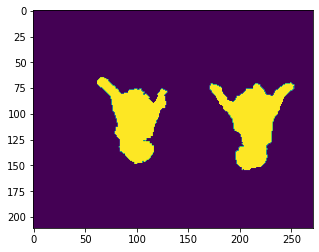

In [3]:
i = 15 # set any valid index of an image
label = df.values[i][1] # retrieve label from first colum in dataframe
im_buf = df.values[i][2:] # create flat array of only the pixels of the given image 
#axis_len = int(np.sqrt(im_buf.shape[0])) # calculate the dimensions of the square image
im_array = np.int8(np.reshape(im_buf, (211, 271))) # create a 2D array from flat array
img = Image.fromarray(im_array, 'L') # convert to a PIL.Image object ('L' is for grayscale)

print(f'Label: {label}')
imshow(np.asarray(img))
#img.show()

In [4]:
images = np.zeros((len(df),211,271))

In [5]:
for i in range(len(df)) :
#     label = df.values[i][1] # retrieve label from first colum in dataframe
    im_buf = df.values[i][2:] # create flat array of only the pixels of the given image 
    #axis_len = int(np.sqrt(im_buf.shape[0])) # calculate the dimensions of the square image
    images[i] = np.reshape(im_buf, (211, 271)) # create a 2D array from flat array
    if (i+1)%1000==0:
        print(i)

999
1999


In [6]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(211, 271, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(16, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2021-12-08 23:42:19.615001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 23:42:19.711531: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 23:42:19.712305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 23:42:19.713626: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 211, 271, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 209, 269, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 104, 134, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 102, 132, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 66, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 64, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0     

In [9]:
labels = np.array(df['label'])-1

In [10]:
n_values = np.max(labels) + 1
targets = np.eye(n_values)[labels]

In [11]:
targets.shape

(2999, 16)

In [12]:
model.compile(optimizer="adam",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
model.fit(x=images, y=targets, epochs=10, batch_size=64)

2021-12-08 23:42:22.728765: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 685943276 exceeds 10% of free system memory.
2021-12-08 23:42:23.456248: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 685943276 exceeds 10% of free system memory.
2021-12-08 23:42:23.968740: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-12-08 23:42:25.274681: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


47/47 [==============================] - 10s 68ms/step - loss: 15.4174 - accuracy: 0.8730
Epoch 2/10
47/47 [==============================] - 3s 55ms/step - loss: 0.0022 - accuracy: 0.9990
Epoch 3/10
47/47 [==============================] - 3s 55ms/step - loss: 1.9461e-05 - accuracy: 1.0000
Epoch 4/10
47/47 [==============================] - 3s 55ms/step - loss: 2.7060e-06 - accuracy: 1.0000
Epoch 5/10
47/47 [==============================] - 3s 56ms/step - loss: 1.7356e-06 - accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 3s 57ms/step - loss: 1.2118e-06 - accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 3s 55ms/step - loss: 9.0278e-07 - accuracy: 1.0000
Epoch 8/10
47/47 [==============================] - 3s 55ms/step - loss: 6.9450e-07 - accuracy: 1.0000
Epoch 9/10
47/47 [==============================] - 3s 56ms/step - loss: 5.4353e-07 - accuracy: 1.0000
Epoch 10/10
47/47 [==============================] - 3s 55ms/step - loss: 4.3963e-07 - acc

In [13]:
test = pd.read_csv("/kaggle/input/hand-gesture-recognition-2nd-edition/test.csv")

In [14]:
test

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel57171,pixel57172,pixel57173,pixel57174,pixel57175,pixel57176,pixel57177,pixel57178,pixel57179,pixel57180
0,3000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3994,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,3995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,3996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,3997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
images_t = np.zeros((len(test),211,271))
for i in range(len(test)) :
#     label = df.values[i][1] # retrieve label from first colum in dataframe
    im_buf = test.values[i][1:] # create flat array of only the pixels of the given image 
    #axis_len = int(np.sqrt(im_buf.shape[0])) # calculate the dimensions of the square image
    images_t[i] = np.reshape(im_buf, (211, 271)) # create a 2D array from flat array
    if (i+1)%1000==0:
        print(i)

In [16]:
y_test = model.predict(images_t)

In [17]:
y_test = np.argmax(y_test,1)

In [18]:
y_test+=1

In [19]:
sample = pd.read_csv("/kaggle/input/hand-gesture-recognition-2nd-edition/sample_submission.csv")

In [20]:
submission = pd.DataFrame({'id':test.id,'label':y_test})

In [21]:
submission.to_csv('submission.csv',index=False)